# PCA Assignment

Sami Ali

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

Loading Data

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

In [4]:
df = pd.read_csv(url,names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

Separating out continuous numerical attributes

In [6]:
df = df.select_dtypes(exclude=['object'])
df.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


Standardizing the attributes

In [7]:
x = StandardScaler().fit_transform(df)

Applying PCA

In [8]:
pca = PCA()
pca.fit_transform(x);

[5.66327865 2.06393304 0.97359585 0.51023591 0.28809477 0.25971235
 0.12508537 0.09029827 0.05282511 0.02196028]
[0.56356529 0.7689518  0.86583646 0.91661115 0.9452801  0.97112464
 0.98357216 0.99255794 0.99781468 1.        ]


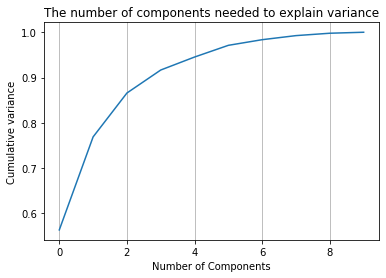

In [9]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.cumsum())
_=plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance')
plt.title('The number of components needed to explain variance')
plt.grid(axis='x')

From the figure shown above, the best number of clusters is 2. We will get 77% variance of date if we choose n_components = 2. Thus, k-mean is suitable for our 2D data.

In [10]:
pca2 = PCA(n_components=2)
data2 = pca2.fit_transform(x)

Applying K-means on 2D data

In [11]:
centroid1, labels1, inertia1 = k_means(data2, n_clusters=2, random_state=42)

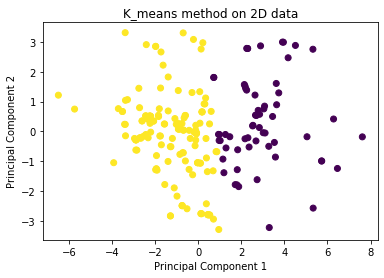

In [13]:
plt.scatter(x=data2[:,0], y=data2[:,1], c=labels1)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K_means method on 2D data");

Applying K-means on original data

In [14]:
centroid2, labels2, inertia2 = k_means(x, n_clusters=2, random_state=42)

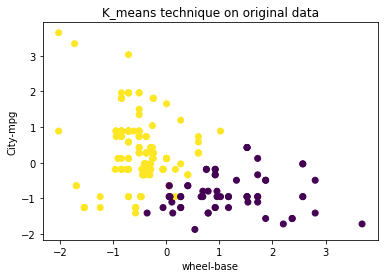

In [15]:
plt.scatter(x=x[:,1], y=x[:,8], c=labels2)
plt.xlabel("wheel-base")
plt.ylabel("City-mpg")
plt.title("K_means technique on original data");

In [17]:
print(sum(abs(labels1 - labels2)))

0


Zero means that there is no difference in clusters when we use k-mean clustering techique on the original data and 2D data.

# Using Iris data and DBSCAN clustering

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()

[4.22824171 0.24267075 0.0782095  0.02383509]
[0.92461872 0.97768521 0.99478782 1.        ]


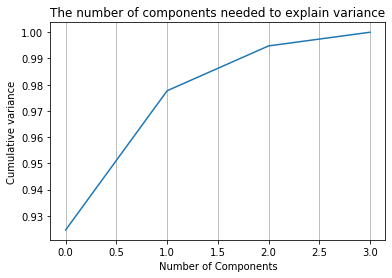

In [19]:
pcaa = PCA().fit(iris.data)
pca_2 = pcaa.transform(iris.data)
print(pcaa.explained_variance_)
print(pcaa.explained_variance_ratio_.cumsum())
_=plt.plot(pcaa.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance')
plt.title('The number of components needed to explain variance')
plt.grid(axis='x')

From the figure shown above, the best number of clusters is 2. We can use K-means like we did in previous example but we will use DBSCAN as a different technique.

In [20]:
dbscan = DBSCAN()

In [22]:
dbscan.fit(iris.data);

In [23]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

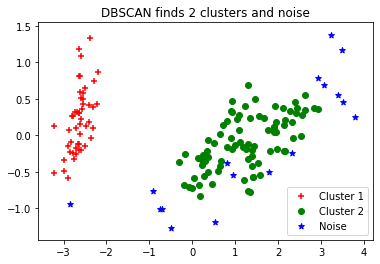

In [24]:
for i in range(0, pca_2.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2[i,0],pca_2[i,1],c='r',marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2[i,0],pca_2[i,1],c='g',marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2[i,0],pca_2[i,1],c='b',marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()